# Features Covered:

Winning / Losing Field Goal Attempts - Percent of field goals attempted by winning vs. losing team

Winning / Losing Field Goals Made - Percent of field goals made by winning vs. losing team

Winning / Losing Free Throw Attempts - Percent of free throws attempted by winning vs. losing team

Winning / Losing Free Throws Made - Percent of free throws made by winning vs. losing team

## Setup

In [67]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# display multiple outputs, default is 'last_expr' (last expression)
# http://ipython.readthedocs.io/en/stable/config/options/terminal.html
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from scipy.stats import ttest_ind, ttest_ind_from_stats
from sqlalchemy import create_engine

In [65]:
import psycopg2 as pg


In [ ]:
# Establish connection to postgres
conn = pg.connect(database='postgres',
                  user='postgres',
                  password='w207final',
                  host='35.185.225.167')

In [10]:
data_dir = 'C:\\Users\\Alex\\OneDrive\\Documents\\Berkeley MIDS\\W207 - Machine Learning\\HW_Projects\\Final_Project\\Raw_Data\\All_Extracted\\'
#out_dir = './output/'

In [11]:
#df_reg_compact = pd.read_csv(data_dir + "RegularSeasonCompactResults.csv")
df_reg = pd.read_csv(data_dir + "RegularSeasonDetailedResults.csv")

In [12]:
df_tourney = pd.read_csv(data_dir + "NCAATourneyCompactResults.csv")
df_tourney.dtypes

Season      int64
DayNum      int64
WTeamID     int64
WScore      int64
LTeamID     int64
LScore      int64
WLoc       object
NumOT       int64
dtype: object

In [15]:
df_reg.dtypes

Season      int64
DayNum      int64
WTeamID     int64
WScore      int64
LTeamID     int64
LScore      int64
WLoc       object
NumOT       int64
WFGM        int64
WFGA        int64
WFGM3       int64
WFGA3       int64
WFTM        int64
WFTA        int64
WOR         int64
WDR         int64
WAst        int64
WTO         int64
WStl        int64
WBlk        int64
WPF         int64
LFGM        int64
LFGA        int64
LFGM3       int64
LFGA3       int64
LFTM        int64
LFTA        int64
LOR         int64
LDR         int64
LAst        int64
LTO         int64
LStl        int64
LBlk        int64
LPF         int64
dtype: object

In [21]:
# Winning / Losing Field Goal Attempts - Percent of field goals attempted by winning vs. losing teams

df_reg['win_lose_fg_attempts'] = df_reg['WFGA'] / df_reg['LFGA']
df_reg['win_lose_fg_attempts'].head()

0    1.094340
1    0.925373
2    0.794521
3    0.775510
4    0.983871
Name: win_lose_fg_attempts, dtype: float64

In [20]:
# Winning / Losing Field Goals Made - Percent of field goals made by winning vs. losing teams

df_reg['win_lose_fg_made'] = df_reg['WFGM'] / df_reg['LFGM']
df_reg['win_lose_fg_made'].head()

0    1.227273
1    1.083333
2    1.090909
3    1.000000
4    1.250000
Name: win_lose_fg_made, dtype: float64

In [37]:
# Winning / Losing Free Throw Attempts - Percent of free throws attempted by winning vs. losing team

df_reg['win_lose_ft_attempts'] = df_reg['WFTA'] / df_reg['LFTA']
df_reg['win_lose_ft_attempts'].head()


0    0.818182
1    0.950000
2    1.260870
3    2.066667
4    0.481481
Name: win_lose_ft_attempts, dtype: float64

In [40]:
# Winning / Losing Free Throws Made - Percent of free throws made by winning vs. losing team

df_reg['win_lose_ft_made'] = df_reg['WFTM'] / df_reg['LFTM']
df_reg['win_lose_ft_made'].head()


0    0.687500
1    1.111111
2    1.214286
3    2.125000
4    0.647059
Name: win_lose_ft_made, dtype: float64

## EDA

### Summary Statistics

In [43]:
df_reg[['win_lose_fg_attempts', 'win_lose_fg_made']].describe()

,win_lose_fg_attempts,win_lose_fg_made
count,82041.000000,82041.000000
mean,0.990770,1.186750
std,0.162779,0.276036
min,0.442623,0.538462
25%,0.876923,1.000000
50%,0.980769,1.130435
75%,1.089286,1.312500
max,2.000000,4.833333


In [42]:
df_reg[['WFGA', 'LFGA', 'win_lose_fg_attempts', 'WFGM', 'LFGM', 'win_lose_fg_made']].describe()

,WFGA,LFGA,win_lose_fg_attempts,WFGM,LFGM,win_lose_fg_made
count,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000
mean,55.038334,56.286796,0.990770,26.037286,22.537146,1.186750
std,7.585434,7.706462,0.162779,4.701946,4.387217,0.276036
min,27.000000,26.000000,0.442623,10.000000,6.000000,0.538462
25%,50.000000,51.000000,0.876923,23.000000,20.000000,1.000000
50%,55.000000,56.000000,0.980769,26.000000,22.000000,1.130435
75%,60.000000,61.000000,1.089286,29.000000,25.000000,1.312500
max,103.000000,106.000000,2.000000,56.000000,47.000000,4.833333


In [44]:
df_reg[['win_lose_ft_attempts', 'win_lose_ft_made']].describe()

,win_lose_ft_attempts,win_lose_ft_made
count,8.204100e+04,8.204100e+04
mean,inf,inf
std,NaN,NaN
min,0.000000e+00,0.000000e+00
25%,9.285714e-01,9.375000e-01
50%,1.266667e+00,1.333333e+00
75%,1.750000e+00,1.916667e+00
max,inf,inf


In [45]:
df_reg[['WFTA', 'LFTA', 'win_lose_ft_attempts', 'WFTM', 'LFTM', 'win_lose_ft_made']].describe()

,WFTA,LFTA,win_lose_ft_attempts,WFTM,LFTM,win_lose_ft_made
count,82041.000000,82041.000000,8.204100e+04,82041.000000,82041.000000,8.204100e+04
mean,22.776124,18.094258,inf,16.160042,12.209468,inf
std,8.133670,7.154317,NaN,6.256617,5.372825,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,17.000000,13.000000,9.285714e-01,12.000000,8.000000,9.375000e-01
50%,22.000000,18.000000,1.266667e+00,16.000000,12.000000,1.333333e+00
75%,28.000000,23.000000,1.750000e+00,20.000000,16.000000,1.916667e+00
max,67.000000,61.000000,inf,48.000000,42.000000,inf


### Charts and Graphs

{'boxes': [<matplotlib.lines.Line2D at 0x12f5c588>,
 'caps': [<matplotlib.lines.Line2D at 0x12f6b320>,
 'fliers': [<matplotlib.lines.Line2D at 0x12f773c8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12f6be10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12f5c748>,
  <matplotlib.lines.Line2D at 0x12f86438>]}

([<matplotlib.axis.XTick at 0xf24cba8>, <matplotlib.axis.XTick at 0x131d95f8>],
 <a list of 2 Text xticklabel objects>)

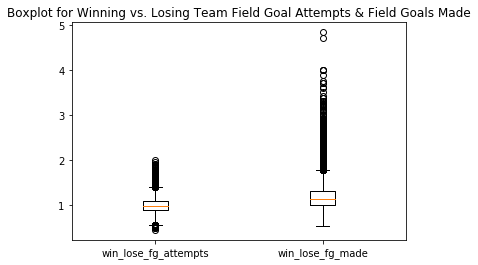

In [55]:
data = [df_reg['win_lose_fg_attempts'], df_reg['win_lose_fg_made'],]
labels = ['win_lose_fg_attempts', 'win_lose_fg_made']
plt.figure()
plt.boxplot(data)
plt.title('Boxplot for Winning vs. Losing Team Field Goal Attempts & Field Goals Made')
#plt.xlabel('Combined Shooting %, Winning Team Shooting %, Losing Team Shooting %')

plt.xticks([1, 2], ['win_lose_fg_attempts', 'win_lose_fg_made'])

{'boxes': [<matplotlib.lines.Line2D at 0x11f65e80>,
 'caps': [<matplotlib.lines.Line2D at 0x15949c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x15943cc0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x15943748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x15949080>,
  <matplotlib.lines.Line2D at 0x1595ad30>]}

([<matplotlib.axis.XTick at 0x1599e2e8>,
 <a list of 2 Text xticklabel objects>)

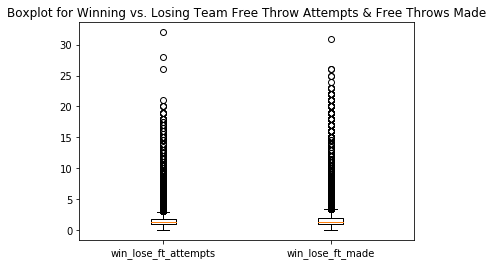

In [63]:
data = [df_reg['win_lose_ft_attempts'], df_reg['win_lose_ft_made'],]
labels = ['win_lose_ft_attempts', 'win_lose_ft_made']
plt.figure()
plt.boxplot(data)
plt.title('Boxplot for Winning vs. Losing Team Free Throw Attempts & Free Throws Made')
#plt.xlabel('Combined Shooting %, Winning Team Shooting %, Losing Team Shooting %')

plt.xticks([1, 2], ['win_lose_ft_attempts', 'win_lose_ft_made'])

In [71]:
t, p = ttest_ind(df_reg['win_lose_fg_attempts'], df_reg['win_lose_fg_made'], equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = -175.17  p = 0.0000


## Commentary

When looking at the winning team vs. losing team Field Goal Attempts ratio distribution, it is interesting that on averge the losing teams attempt more field goals (two and three point shots) in a given game.  The mean of the distribution is 0.990770, which tilts slightly towards the losing team attempts.

However (and unsurprisingly), the winning teams make more field goals.  The mean of the winning vs. losing team field goals made distribution is 1.186750, which tilts towards the winning team.  Even for the 25th percentile of the distribution, the ratio is ~ 1.0 : 1.0 for the fields goals made by the winning vs. losing teams.